In [1]:
%matplotlib ipympl
import numpy as np
import sys

# setting path for mask_utils package
sys.path.append('..')

from mask_utils.code_utils import next_prime, ura_mura
from mask_utils.imaging_utils import solid_angle, decode, decode_var, generate_bulk, get_openfraction, eff_area_vs_off_axis
from mask_utils.fits_utils import read_mask_bulk, write_mask_fits
from mask_utils.image_utils import upscale, fshift

import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
mask_file = "F:/CodedMasks/mask_050_1040x17/mask_050_1040x17_20250710.fits"

In [3]:
mask, hdmask = read_mask_bulk(mask_file, 'MASK', header_out=True, verbose=False)
rmatrix = read_mask_bulk(mask_file, 'RMATRIX', header_out=False, verbose=False)
bulk = read_mask_bulk(mask_file, 'SENS', header_out=False, verbose=False)

In [4]:
#Gets mask information and define X, Y vectors (centers and edges)
ELXDIM = hdmask['ELXDIM']
ELYDIM = hdmask['ELYDIM']
MTHICK = hdmask['MTHICK']
FOCAL = 202.9

In [5]:
thetaX, thetaY  = np.linspace(-45, 45, 46), np.linspace(-45, 45, 46)
eff_area = np.zeros((len(thetaX), len(thetaY)))

In [6]:
for i in range(len(thetaX)):
    for j in range(len(thetaY)):
        eff_area[i, j] = 0.01 * eff_area_vs_off_axis(mask.T.astype('int32'), bulk.T, ELXDIM, ELYDIM, FOCAL, MTHICK, thetaX[i], thetaY[j], degrees=True)

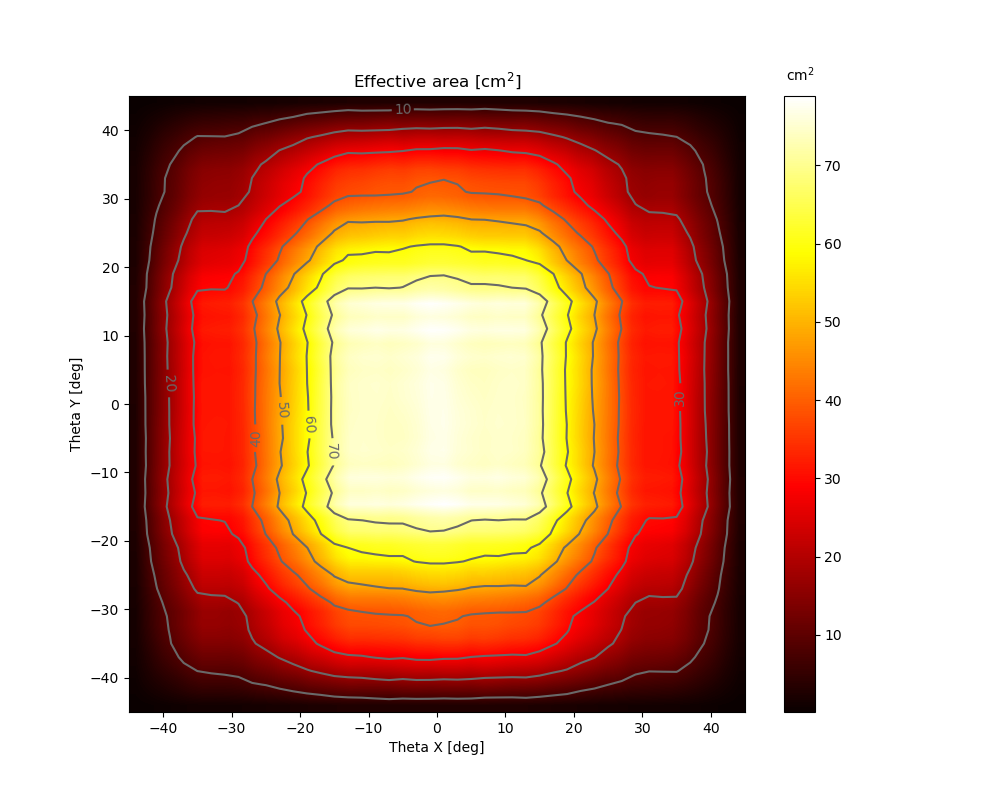

In [7]:
levels = np.arange(np.max(eff_area), step=10)
#levels = np.append(levels, 74)

fig, ax = plt.subplots(1, 1, constrained_layout=False, figsize=(10, 8))
ax.set_title("Effective area [cm$^2$]")
im = ax.imshow(eff_area.T, cmap=cm.hot,  interpolation='bilinear', extent=[-45,45,-45,45])
ax.set_xlabel("Theta X [deg]")
ax.set_ylabel("Theta Y [deg]")
cs = ax.contour(eff_area.T, levels, extent=[-45,45,-45,45], colors='dimgray')
ax.clabel(cs, cs.levels, fontsize=10)
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('cm$^2$', rotation=0, labelpad=-30, y=1.05)
plt.show()